Analysis of dataset Iris (CSV) on google colaboratry (1/Nov/2021)

Class label is replaced with a number instead of the product name

Official documentation: https://scikit-learn.org/

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# This part is not necessary if you are creating a dataset on "02_data_generation_and_iris_csv_data.ipynb"
#from google.colab import files
#uploaded = files.upload() # iris.csv

Saving iris.csv to iris.csv


In [ ]:
df = pd.read_csv('iris.csv')

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class label
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
# Assign descriptors and class labels to different variables
X = df.iloc[:,[0,1,2,3]].values
y = df.iloc[:,4].values

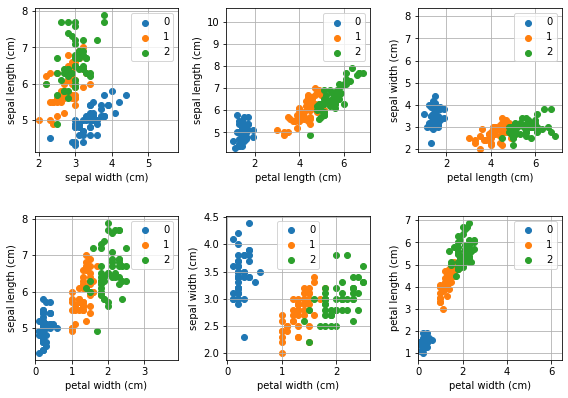

In [ ]:
# Visualize descriptor pairs
plt.figure(figsize=(8,6))
cnt=1
for i in range(4):
    for j in range(i):
        plt.subplot(2,3,cnt)
        for k in range(3):
            n = (y==k)
            plt.scatter(X[n,i], X[n,j], label=k)
        plt.legend()
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.grid()
        plt.axis('square')
        cnt += 1
plt.tight_layout()
plt.show()

Exercise

In [ ]:
from sklearn.svm import LinearSVC as classifier
clf = classifier(C=1.0) 
# 
# from sklearn.svm import SVC as classifier
# clf = classifier()
#
# from sklearn.neighbors import KNeighborsClassifier as classifier
# clf = classifier()
#
# from sklearn.ensemble import BaggingClassifier as classifier
# clf = classifier(n_estimators=10)
#
# from sklearn.ensemble import RandomForestClassifier as classifier
# clf = classifier()
#
# from sklearn.ensemble import AdaBoostClassifier as classifier
# clf = classifier(n_estimators=100) 
#
# from sklearn.ensemble import GradientBoostingRegresso as classifier
# clf = classifier(random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split as spl
x_train, x_test, y_train, y_test = spl(X, y, test_size=0.2, random_state=0)
clf.fit(x_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
clf.score(x_test, y_test)

1.0

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix as cfm
cfm(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [ ]:
from sklearn.metrics import accuracy_score as acs
acs(y_test, y_pred)

1.0

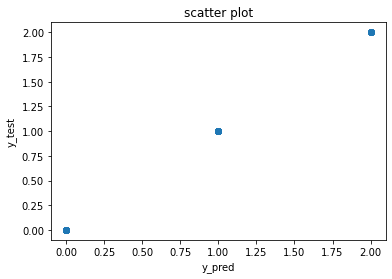

In [ ]:
plt.title("scatter plot")
plt.scatter(y_pred, y_test)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()